In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib


In [3]:

df = pd.read_csv("Final_Dataset_classified.csv")

print("Shape:", df.shape)
print(df.head())


Shape: (1287, 10)
    lat     lon  precipitation_mm_day  wind_speed_ms  temperature_K  \
0  21.0  19.375              0.050856       5.951021      296.46620   
1  21.0  20.000              0.032792       6.152714      296.21110   
2  21.0  20.625              0.039034       6.473846      296.54930   
3  21.0  21.250              0.038189       6.621065      296.91696   
4  21.0  21.875              0.043102       6.774587      297.00623   

   temperature_C   Rain_Cond Temp_Cond Wind_Cond                   Condition  
0      23.316193  Light Rain      Mild    Breezy  Light Rain | Mild | Breezy  
1      23.061096  Light Rain      Mild    Breezy  Light Rain | Mild | Breezy  
2      23.399292  Light Rain      Mild    Breezy  Light Rain | Mild | Breezy  
3      23.766968  Light Rain      Mild    Breezy  Light Rain | Mild | Breezy  
4      23.856232  Light Rain      Mild    Breezy  Light Rain | Mild | Breezy  


In [4]:
def categorize_rain(x):
    if x == 0:
        return "No Rain"
    elif x < 2:
        return "Light"
    elif x < 10:
        return "Moderate"
    else:
        return "Heavy"

df["Rain_Category"] = df["precipitation_mm_day"].apply(categorize_rain)
print(df["Rain_Category"].value_counts())


Rain_Category
Light       1192
Moderate      95
Name: count, dtype: int64


In [5]:
X = df[["temperature_C", "wind_speed_ms"]]  # Features
y = df["Rain_Category"]                      # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [6]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.9341085271317829

Classification Report:
               precision    recall  f1-score   support

       Light       0.95      0.98      0.97       239
    Moderate       0.60      0.32      0.41        19

    accuracy                           0.93       258
   macro avg       0.77      0.65      0.69       258
weighted avg       0.92      0.93      0.92       258



In [ ]:
y_prob = rf.predict_proba(X_test)

results = X_test.copy()
results["Actual"] = y_test.values
results["Predicted"] = y_pred
results["Confidence"] = y_prob.max(axis=1)
results["Uncertainty"] = 1 - results["Confidence"]

print(results.head(10))


      temperature_C  wind_speed_ms Actual Predicted  Confidence  Uncertainty
831       20.398743       6.750365  Light     Light    1.000000     0.000000
698       20.518555       6.085304  Light     Light    0.985208     0.014792
1031      19.593689       7.109333  Light     Light    0.939899     0.060101
146       23.699097       6.824832  Light     Light    1.000000     0.000000
1152      11.567474       5.171123  Light     Light    0.987821     0.012179
502       21.672577       5.703918  Light     Light    1.000000     0.000000
488       24.268616       5.437214  Light     Light    0.988667     0.011333
1101      19.276001       6.818602  Light     Light    0.823602     0.176398
520       24.271973       6.618811  Light     Light    1.000000     0.000000
459       21.961090       5.787374  Light     Light    0.997500     0.002500


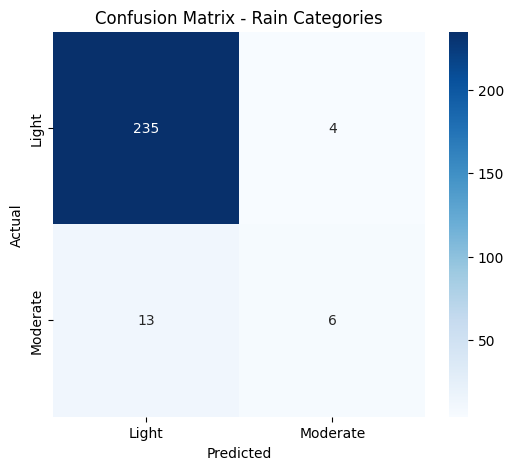

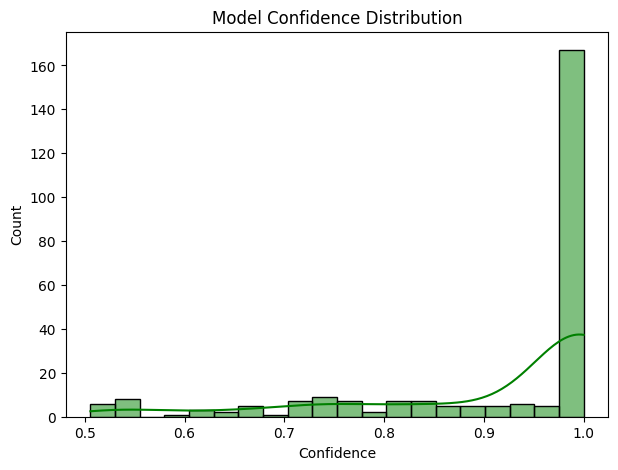

In [8]:
# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d",
            cmap="Blues", xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Rain Categories")
plt.show()

# Probability Distribution
plt.figure(figsize=(7,5))
sns.histplot(results["Confidence"], kde=True, bins=20, color="green")
plt.title("Model Confidence Distribution")
plt.xlabel("Confidence")
plt.show()


In [9]:
joblib.dump(rf, "best_rf_model.joblib")
print("✅ Model saved as best_rf_model.joblib")


✅ Model saved as best_rf_model.joblib
